## Evaluation of methods using gold standard corpus (see 1_sentiment_annotation)

In this notebook, the methods will be evaluated sing the gold standard corpora created by four annotators for polarity and emotion analysis.

### Including metadata

In [1]:
import pandas as pd
import csv
import pandas as pd
import numpy as np
import nltk
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
tqdm.pandas()

from scipy.stats import ks_2samp
from IPython.core.display import display, HTML

In [2]:
information = pd.read_csv('input/survey.txt', delimiter=',', encoding='utf-8')

In [3]:
information.columns = ['question_code', 'narrative_form','periodical_name']
information.columns = ['question_code', 'narrative_form','periodical_name']
information

,question_code,narrative_form,periodical_name
0,Q2,??,1761-07-08_El-Duende-especulativo-sobre-la-vid...
1,Q3,??,1761-07-27_El-Duende-especulativo-sobre-la-vid...
2,Q4,??,1761-09-05_El-Duende-especulativo-sobre-la-vid...
3,Q5,??,1761-09-26_El-Duende-especulativo-sobre-la-vi...
4,Q6,??,1761-07-27_El-Duende-especulativo-sobre-la-vid...
5,Q50,D,1786_El-Juzgado-Casero_Anónimo_Vol-1_Nr-01_47...
6,Q51,FP,1786_El-Juzgado-Casero_Anónimo_Vol-1_Nr-01_47...
7,Q7,??,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallad...
8,Q8,??,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...
9,Q52,D,1787-1788_El-Duende-de-Madrid_Pedro-Pablo-Tru...


In [4]:
information['question_code'] = information['question_code'].str.strip()
information['narrative_form'] = information['narrative_form'].str.strip()


### Polarity analysis

In [5]:
gold_polarity = pd.read_csv('input/gold_standard_corpus/4_annotators/gold_polarities.csv', delimiter=',', encoding='latin-1')
gold_polarity

,question_code,sentence,annotation
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",negative
1,G01Q02,"Continuamente la oygo decir à sus solas, y mas...",neutral
2,G01Q03,Matò à un Joven por haver murmurado de la cond...,negative
3,G01Q04,"Pero no havia pisado sus umbrales, quando la D...",neutral
4,G01Q05,"Su tierno corazon, su espiritu admirable, su m...",positive
...,...,...,...
187,G00Q265,Nos quexamos continuamente de que nuestros dia...,negative
188,G00Q267,"Los dos sexôs, y todos los estados de la repúb...",negative
189,G00Q268,aplaude la buena educacion Francesa;,positive
190,G00Q269,"Si vmd. ama mas las alabanzas que el mérito, a...",neutral


# Pysentimiento (polarity)

In [6]:
from pysentimiento import create_analyzer

In [7]:
analyzer = create_analyzer (task='sentiment', lang='es')

In [8]:
gold_polarity['sentence'] = gold_polarity['sentence'].astype(str)


In [9]:
gold_polarity['nf_sentiment_pysentimiento'] = analyzer.predict(gold_polarity['sentence'])


Map:   0%|          | 0/192 [00:00<?, ? examples/s]

In [10]:
gold_polarity

,question_code,sentence,annotation,nf_sentiment_pysentimiento
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",negative,"AnalyzerOutput(output=NEG, probas={NEG: 0.965,..."
1,G01Q02,"Continuamente la oygo decir à sus solas, y mas...",neutral,"AnalyzerOutput(output=NEU, probas={NEU: 0.632,..."
2,G01Q03,Matò à un Joven por haver murmurado de la cond...,negative,"AnalyzerOutput(output=NEG, probas={NEG: 0.922,..."
3,G01Q04,"Pero no havia pisado sus umbrales, quando la D...",neutral,"AnalyzerOutput(output=NEG, probas={NEG: 0.769,..."
4,G01Q05,"Su tierno corazon, su espiritu admirable, su m...",positive,"AnalyzerOutput(output=POS, probas={POS: 0.922,..."
...,...,...,...,...
187,G00Q265,Nos quexamos continuamente de que nuestros dia...,negative,"AnalyzerOutput(output=NEG, probas={NEG: 0.914,..."
188,G00Q267,"Los dos sexôs, y todos los estados de la repúb...",negative,"AnalyzerOutput(output=NEU, probas={NEU: 0.524,..."
189,G00Q268,aplaude la buena educacion Francesa;,positive,"AnalyzerOutput(output=POS, probas={POS: 0.846,..."
190,G00Q269,"Si vmd. ama mas las alabanzas que el mérito, a...",neutral,"AnalyzerOutput(output=NEG, probas={NEG: 0.845,..."


# Polarity dictionaries

In [11]:
import nltk

In [12]:
language = "spanish"

dictionary_dir = "input/dictionaries/manual/"
dictionaryCorr = "input/dictionaries/computational_corrected/"
dictionaryComp = "input/dictionaries/computational/"

### Manually made polarity dictionary

In [13]:
sentiment_dict = {}
with open("{}{}_negative.txt".format(dictionary_dir, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["neg"] = fr.read().splitlines()
with open("{}{}_positive.txt".format(dictionary_dir, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["pos"] = fr.read().splitlines()

print("loaded {} negative words".format(len(sentiment_dict["neg"])))
print("loaded {} positive words".format(len(sentiment_dict["pos"])))

loaded 798 negative words
loaded 681 positive words


In [14]:
def compute_sentiment(text):
    tokens = nltk.word_tokenize(text)
    tokens = [t.lower() for t in tokens]
    num_negative = 0
    num_positive = 0
    for nw in sentiment_dict["neg"]:
        num_negative += tokens.count(nw.lower())
    for pw in sentiment_dict["pos"]:
        num_positive += tokens.count(pw.lower())
    try:
        sentiment_score = (num_positive - num_negative) / (num_positive + num_negative)
    except ZeroDivisionError:
        sentiment_score = 0
    return sentiment_score

In [15]:
gold_polarity["nf_sentiment_lexicon_dispecs"] = gold_polarity["sentence"].progress_apply(compute_sentiment)

  0%|          | 0/192 [00:00<?, ?it/s]

### Computationally generated dictionary

In [16]:
sentiment_dict = {}
with open("{}{}_negative.txt".format(dictionaryComp, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["neg"] = fr.read().splitlines()
with open("{}{}_positive.txt".format(dictionaryComp, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["pos"] = fr.read().splitlines()

print("loaded {} negative words".format(len(sentiment_dict["neg"])))
print("loaded {} positive words".format(len(sentiment_dict["pos"])))

loaded 691 negative words
loaded 1034 positive words


In [17]:
gold_polarity["nf_sentiment_lexicon_computational"] = gold_polarity["sentence"].progress_apply(compute_sentiment)

  0%|          | 0/192 [00:00<?, ?it/s]

### Computationally generated and manually corrected dictionary

In [18]:
sentiment_dict = {}
with open("{}{}_negative.txt".format(dictionaryCorr, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["neg"] = fr.read().splitlines()
with open("{}{}_positive.txt".format(dictionaryCorr, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["pos"] = fr.read().splitlines()

print("loaded {} negative words".format(len(sentiment_dict["neg"])))
print("loaded {} positive words".format(len(sentiment_dict["pos"])))

loaded 812 negative words
loaded 692 positive words


In [19]:
gold_polarity["nf_sentiment_lexicon_corrected"] = gold_polarity["sentence"].progress_apply(compute_sentiment)

  0%|          | 0/192 [00:00<?, ?it/s]

# Making nicer columns (please make sure how to run) - change column_name

In [20]:
def change_values(row):
        if row == 0.000000 :    
            return 'NEU'
        elif row > 0.000000:  
            return 'POS'
        elif row < 0.000000:  
            return 'NEG'
        else:          
            return 'error'

In [21]:
gold_polarity['manual_lexicon_sent_score'] = gold_polarity['nf_sentiment_lexicon_dispecs'].apply(change_values)


In [22]:
gold_polarity['comp_lexicon_sent_score'] = gold_polarity['nf_sentiment_lexicon_computational'].apply(change_values)

In [23]:
gold_polarity['corr_lexicon_sent_score'] = gold_polarity['nf_sentiment_lexicon_corrected'].apply(change_values)

In [24]:
gold_polarity

,question_code,sentence,annotation,nf_sentiment_pysentimiento,nf_sentiment_lexicon_dispecs,nf_sentiment_lexicon_computational,nf_sentiment_lexicon_corrected,manual_lexicon_sent_score,comp_lexicon_sent_score,corr_lexicon_sent_score
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",negative,"AnalyzerOutput(output=NEG, probas={NEG: 0.965,...",1.000000,0.000000,1.000000,POS,NEU,POS
1,G01Q02,"Continuamente la oygo decir à sus solas, y mas...",neutral,"AnalyzerOutput(output=NEU, probas={NEU: 0.632,...",1.000000,1.000000,1.000000,POS,POS,POS
2,G01Q03,Matò à un Joven por haver murmurado de la cond...,negative,"AnalyzerOutput(output=NEG, probas={NEG: 0.922,...",0.000000,0.000000,0.000000,NEU,NEU,NEU
3,G01Q04,"Pero no havia pisado sus umbrales, quando la D...",neutral,"AnalyzerOutput(output=NEG, probas={NEG: 0.769,...",0.000000,0.000000,0.000000,NEU,NEU,NEU
4,G01Q05,"Su tierno corazon, su espiritu admirable, su m...",positive,"AnalyzerOutput(output=POS, probas={POS: 0.922,...",0.714286,0.714286,0.714286,POS,POS,POS
...,...,...,...,...,...,...,...,...,...,...
187,G00Q265,Nos quexamos continuamente de que nuestros dia...,negative,"AnalyzerOutput(output=NEG, probas={NEG: 0.914,...",0.000000,0.000000,0.000000,NEU,NEU,NEU
188,G00Q267,"Los dos sexôs, y todos los estados de la repúb...",negative,"AnalyzerOutput(output=NEU, probas={NEU: 0.524,...",0.000000,0.000000,0.000000,NEU,NEU,NEU
189,G00Q268,aplaude la buena educacion Francesa;,positive,"AnalyzerOutput(output=POS, probas={POS: 0.846,...",1.000000,1.000000,1.000000,POS,POS,POS
190,G00Q269,"Si vmd. ama mas las alabanzas que el mérito, a...",neutral,"AnalyzerOutput(output=NEG, probas={NEG: 0.845,...",1.000000,1.000000,1.000000,POS,POS,POS


In [25]:
gold_polarity['nf_sentiment_pysentimiento'] = gold_polarity['nf_sentiment_pysentimiento'].astype('string')
gold_polarity['sentiment_py'] = gold_polarity['nf_sentiment_pysentimiento'].str.findall(r'\=([^,]+)\, probas')
gold_polarity['sentiment_py'] = gold_polarity['sentiment_py'].astype('string')
gold_polarity['sentiment_py'] = gold_polarity['sentiment_py'].str.replace('[', '')
gold_polarity['sentiment_py'] = gold_polarity['sentiment_py'].str.replace(']', '')
gold_polarity['sentiment_py'] = gold_polarity['sentiment_py'].str.replace("'", "")


C:\Users\krusic\AppData\Local\Temp\ipykernel_15440\1558316112.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gold_polarity['sentiment_py'] = gold_polarity['sentiment_py'].str.replace('[', '')
C:\Users\krusic\AppData\Local\Temp\ipykernel_15440\1558316112.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gold_polarity['sentiment_py'] = gold_polarity['sentiment_py'].str.replace(']', '')


In [26]:
gold_polarity

,question_code,sentence,annotation,nf_sentiment_pysentimiento,nf_sentiment_lexicon_dispecs,nf_sentiment_lexicon_computational,nf_sentiment_lexicon_corrected,manual_lexicon_sent_score,comp_lexicon_sent_score,corr_lexicon_sent_score,sentiment_py
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",negative,"AnalyzerOutput(output=NEG, probas={NEG: 0.965,...",1.000000,0.000000,1.000000,POS,NEU,POS,NEG
1,G01Q02,"Continuamente la oygo decir à sus solas, y mas...",neutral,"AnalyzerOutput(output=NEU, probas={NEU: 0.632,...",1.000000,1.000000,1.000000,POS,POS,POS,NEU
2,G01Q03,Matò à un Joven por haver murmurado de la cond...,negative,"AnalyzerOutput(output=NEG, probas={NEG: 0.922,...",0.000000,0.000000,0.000000,NEU,NEU,NEU,NEG
3,G01Q04,"Pero no havia pisado sus umbrales, quando la D...",neutral,"AnalyzerOutput(output=NEG, probas={NEG: 0.769,...",0.000000,0.000000,0.000000,NEU,NEU,NEU,NEG
4,G01Q05,"Su tierno corazon, su espiritu admirable, su m...",positive,"AnalyzerOutput(output=POS, probas={POS: 0.922,...",0.714286,0.714286,0.714286,POS,POS,POS,POS
...,...,...,...,...,...,...,...,...,...,...,...
187,G00Q265,Nos quexamos continuamente de que nuestros dia...,negative,"AnalyzerOutput(output=NEG, probas={NEG: 0.914,...",0.000000,0.000000,0.000000,NEU,NEU,NEU,NEG
188,G00Q267,"Los dos sexôs, y todos los estados de la repúb...",negative,"AnalyzerOutput(output=NEU, probas={NEU: 0.524,...",0.000000,0.000000,0.000000,NEU,NEU,NEU,NEU
189,G00Q268,aplaude la buena educacion Francesa;,positive,"AnalyzerOutput(output=POS, probas={POS: 0.846,...",1.000000,1.000000,1.000000,POS,POS,POS,POS
190,G00Q269,"Si vmd. ama mas las alabanzas que el mérito, a...",neutral,"AnalyzerOutput(output=NEG, probas={NEG: 0.845,...",1.000000,1.000000,1.000000,POS,POS,POS,NEG


# Calculating accuracy

https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [28]:
gold_polarity['sentiment_annotation_list'] = gold_polarity['annotation'].replace(['positive','negative','neutral'],['1','3','2'])



In [29]:
gold_polarity['sentiment_py_list'] = gold_polarity['sentiment_py'].replace(['POS','NEG','NEU'],['1','3','2'])

In [30]:
gold_polarity['corr_lexicon_sent_score_list'] = gold_polarity['corr_lexicon_sent_score'].replace(['POS','NEG','NEU'],['1','3','2'])


In [31]:
gold_polarity['manual_lexicon_sent_score_list'] = gold_polarity['manual_lexicon_sent_score'].replace(['POS','NEG','NEU'],['1','3','2'])


In [32]:
gold_polarity['computational_lexicon_sent_score_list'] = gold_polarity['comp_lexicon_sent_score'].replace(['POS','NEG','NEU'],['1','3','2'])
gold_polarity

,question_code,sentence,annotation,nf_sentiment_pysentimiento,nf_sentiment_lexicon_dispecs,nf_sentiment_lexicon_computational,nf_sentiment_lexicon_corrected,manual_lexicon_sent_score,comp_lexicon_sent_score,corr_lexicon_sent_score,sentiment_py,sentiment_annotation_list,sentiment_py_list,corr_lexicon_sent_score_list,manual_lexicon_sent_score_list,computational_lexicon_sent_score_list
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",negative,"AnalyzerOutput(output=NEG, probas={NEG: 0.965,...",1.000000,0.000000,1.000000,POS,NEU,POS,NEG,3,3,1,1,2
1,G01Q02,"Continuamente la oygo decir à sus solas, y mas...",neutral,"AnalyzerOutput(output=NEU, probas={NEU: 0.632,...",1.000000,1.000000,1.000000,POS,POS,POS,NEU,2,2,1,1,1
2,G01Q03,Matò à un Joven por haver murmurado de la cond...,negative,"AnalyzerOutput(output=NEG, probas={NEG: 0.922,...",0.000000,0.000000,0.000000,NEU,NEU,NEU,NEG,3,3,2,2,2
3,G01Q04,"Pero no havia pisado sus umbrales, quando la D...",neutral,"AnalyzerOutput(output=NEG, probas={NEG: 0.769,...",0.000000,0.000000,0.000000,NEU,NEU,NEU,NEG,2,3,2,2,2
4,G01Q05,"Su tierno corazon, su espiritu admirable, su m...",positive,"AnalyzerOutput(output=POS, probas={POS: 0.922,...",0.714286,0.714286,0.714286,POS,POS,POS,POS,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,G00Q265,Nos quexamos continuamente de que nuestros dia...,negative,"AnalyzerOutput(output=NEG, probas={NEG: 0.914,...",0.000000,0.000000,0.000000,NEU,NEU,NEU,NEG,3,3,2,2,2
188,G00Q267,"Los dos sexôs, y todos los estados de la repúb...",negative,"AnalyzerOutput(output=NEU, probas={NEU: 0.524,...",0.000000,0.000000,0.000000,NEU,NEU,NEU,NEU,3,2,2,2,2
189,G00Q268,aplaude la buena educacion Francesa;,positive,"AnalyzerOutput(output=POS, probas={POS: 0.846,...",1.000000,1.000000,1.000000,POS,POS,POS,POS,1,1,1,1,1
190,G00Q269,"Si vmd. ama mas las alabanzas que el mérito, a...",neutral,"AnalyzerOutput(output=NEG, probas={NEG: 0.845,...",1.000000,1.000000,1.000000,POS,POS,POS,NEG,2,3,1,1,1


In [33]:
len(gold_polarity)

192

In [34]:
sentiment_annotation_list = gold_polarity['sentiment_annotation_list'].tolist()
print(sentiment_annotation_list)

['3', '2', '3', '2', '1', '3', '3', '3', '3', '3', '3', '3', '2', '1', '3', '3', '1', '1', '2', '3', '3', '3', '2', '3', '2', '1', '3', '1', '3', '1', '1', '3', '2', '2', '2', '2', '2', '2', '3', '3', '1', '3', '3', '1', '3', '1', '1', '3', '3', '3', '3', '2', '3', '2', '2', '3', '1', '2', '3', '3', '3', '3', '3', '3', '2', '1', '3', '2', '3', '3', '3', '3', '3', '1', '3', '3', '1', '3', '3', '3', '3', '3', '3', '1', '3', '3', '3', '3', '3', '1', '3', '3', '3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '1', '3', '3', '2', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '1', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '2', '3', '3', '3', '1', '1', '2', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '1', '3', '1', '3', '3', '3', '1', '2', '1']


In [35]:
sentiment_py_list = gold_polarity['sentiment_py_list'].tolist()
print(sentiment_py_list)

['3', '2', '3', '3', '1', '3', '2', '3', '3', '3', '3', '1', '2', '1', '3', '3', '1', '3', '3', '3', '3', '3', '3', '2', '1', '1', '3', '2', '2', '1', '2', '3', '2', '3', '2', '3', '2', '2', '3', '3', '1', '3', '3', '1', '3', '2', '3', '3', '3', '3', '3', '3', '2', '2', '2', '3', '1', '1', '3', '3', '3', '3', '3', '3', '2', '3', '3', '3', '3', '3', '3', '3', '3', '1', '3', '3', '2', '3', '2', '3', '3', '3', '3', '3', '2', '3', '3', '3', '3', '2', '3', '2', '3', '3', '1', '1', '3', '2', '2', '3', '3', '2', '1', '3', '3', '2', '3', '3', '3', '3', '3', '1', '3', '1', '2', '3', '3', '1', '3', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '1', '1', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '1', '3', '3', '1', '3', '3', '3', '3', '1', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '2', '3', '3', '3', '2', '1', '2', '3', '2', '3', '3', '1', '1', '2', '1', '2', '3', '2', '3', '1', '2', '3', '2', '1', '3', '3']


In [36]:
corr_lexicon_sent_score_list = gold_polarity['corr_lexicon_sent_score_list'].tolist()
print(corr_lexicon_sent_score_list)

['1', '1', '2', '2', '1', '2', '1', '1', '1', '2', '1', '1', '1', '1', '2', '3', '1', '3', '2', '1', '1', '2', '1', '3', '2', '1', '3', '2', '3', '1', '1', '3', '1', '1', '2', '1', '2', '2', '1', '1', '1', '3', '2', '1', '1', '1', '2', '3', '3', '3', '1', '1', '1', '1', '1', '3', '1', '1', '3', '3', '3', '2', '3', '3', '1', '1', '1', '2', '3', '3', '1', '3', '1', '1', '1', '1', '3', '2', '2', '3', '1', '2', '3', '2', '1', '2', '1', '2', '1', '2', '3', '3', '2', '1', '1', '1', '3', '1', '3', '2', '2', '2', '1', '3', '3', '1', '1', '3', '3', '3', '3', '1', '1', '1', '2', '1', '1', '1', '3', '1', '2', '2', '3', '3', '3', '3', '1', '3', '2', '1', '1', '2', '3', '3', '3', '3', '1', '1', '3', '2', '1', '1', '1', '3', '1', '1', '1', '1', '1', '3', '1', '2', '2', '3', '2', '2', '3', '1', '3', '2', '3', '3', '3', '3', '2', '2', '1', '2', '3', '3', '1', '1', '3', '3', '3', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2', '1', '1', '2', '2', '1', '1', '1']


In [37]:
manual_lexicon_sent_score_list = gold_polarity['manual_lexicon_sent_score_list'].tolist()
print(manual_lexicon_sent_score_list)

['1', '1', '2', '2', '1', '2', '1', '1', '1', '2', '1', '1', '1', '1', '2', '3', '1', '3', '2', '1', '1', '2', '1', '3', '2', '1', '3', '2', '3', '1', '1', '3', '1', '1', '2', '1', '2', '2', '1', '1', '1', '3', '2', '1', '1', '1', '2', '3', '3', '3', '1', '1', '1', '1', '1', '3', '1', '1', '3', '3', '3', '2', '3', '3', '1', '1', '1', '2', '3', '3', '1', '3', '1', '1', '1', '1', '3', '2', '2', '3', '1', '2', '3', '2', '1', '2', '1', '2', '1', '2', '3', '3', '2', '1', '1', '1', '3', '1', '3', '2', '2', '2', '1', '3', '3', '1', '1', '3', '3', '3', '3', '1', '1', '1', '2', '1', '1', '1', '3', '1', '2', '2', '3', '3', '3', '3', '1', '3', '2', '1', '1', '2', '3', '3', '3', '3', '1', '1', '3', '2', '1', '1', '1', '3', '1', '1', '1', '1', '1', '3', '1', '2', '2', '3', '2', '2', '3', '1', '3', '2', '3', '3', '3', '3', '2', '2', '1', '2', '3', '3', '1', '1', '3', '3', '2', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2', '1', '1', '2', '2', '1', '1', '1']


In [38]:
computational_lexicon_sent_score_list = gold_polarity['computational_lexicon_sent_score_list'].tolist()
print(computational_lexicon_sent_score_list)

['2', '1', '2', '2', '1', '2', '1', '2', '1', '2', '1', '1', '1', '1', '2', '3', '1', '3', '2', '1', '1', '2', '1', '2', '2', '1', '3', '1', '3', '1', '1', '3', '1', '1', '2', '1', '2', '2', '1', '1', '1', '3', '1', '1', '1', '1', '2', '3', '3', '3', '1', '1', '1', '1', '1', '3', '1', '1', '2', '3', '3', '2', '3', '2', '1', '1', '1', '2', '3', '3', '1', '3', '1', '1', '1', '1', '3', '1', '2', '3', '1', '2', '3', '2', '1', '3', '1', '1', '1', '2', '3', '3', '2', '1', '1', '1', '1', '1', '3', '2', '2', '2', '1', '3', '3', '1', '1', '3', '3', '3', '2', '1', '1', '1', '2', '1', '1', '2', '2', '1', '2', '2', '3', '3', '3', '3', '1', '1', '1', '1', '1', '2', '3', '3', '2', '3', '2', '1', '3', '2', '1', '1', '1', '3', '2', '1', '1', '1', '1', '3', '1', '1', '2', '3', '2', '2', '3', '1', '3', '2', '3', '2', '3', '1', '2', '1', '1', '2', '3', '3', '1', '1', '3', '3', '3', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2', '1', '1', '2', '2', '1', '1', '1']


## Pysentimiento sentiment accuracy


In [39]:
accuracy_score(sentiment_annotation_list,sentiment_py_list)

0.734375

Pysentimiento has good accuracy - 73% - https://stephenallwright.com/good-accuracy-score/

In [40]:

print(classification_report(sentiment_annotation_list, sentiment_py_list))


              precision    recall  f1-score   support

           1       0.86      0.56      0.68        45
           2       0.42      0.47      0.44        32
           3       0.80      0.88      0.83       115

    accuracy                           0.73       192
   macro avg       0.69      0.63      0.65       192
weighted avg       0.75      0.73      0.73       192



Recall: out of all the sentences that the model predicted, 76% match the test set. F1 shows that the model did a OK job (77%) of predicting the sentiment. Precision - measure how many of the positive predictions made are correct, recall - how many of the positive cases the classifier correctly predicred over all the pos cases - https://www.statology.org/sklearn-classification-report/, https://stephenallwright.com/interpret-f1-score/, https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec


In [41]:
cm_pysentimiento = confusion_matrix(sentiment_annotation_list, sentiment_py_list)

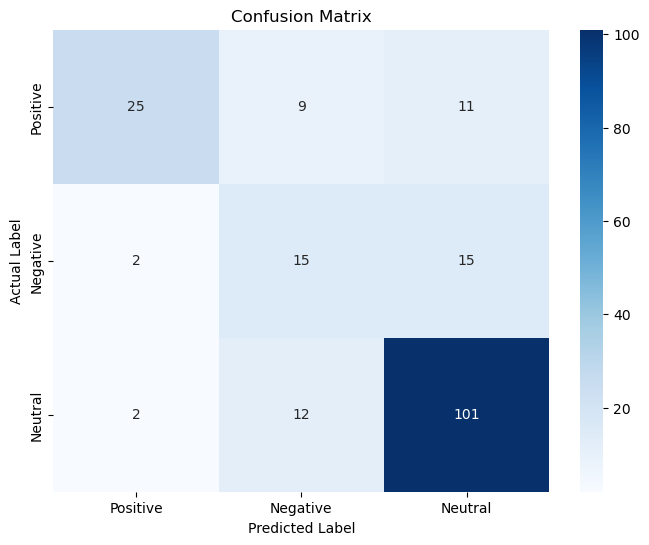

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_pysentimiento, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('plots/confusion_4_annotators/pysentimiento_polarity.png', dpi=300, bbox_inches='tight')

plt.show()

## Corrected lexicon sentiment accuracy

In [43]:
accuracy_score(sentiment_annotation_list,corr_lexicon_sent_score_list)

0.4895833333333333

In [44]:
print(classification_report(sentiment_annotation_list, corr_lexicon_sent_score_list))


              precision    recall  f1-score   support

           1       0.38      0.76      0.50        45
           2       0.22      0.31      0.26        32
           3       0.88      0.43      0.58       115

    accuracy                           0.49       192
   macro avg       0.49      0.50      0.45       192
weighted avg       0.65      0.49      0.51       192



In [45]:
cm_corr = confusion_matrix(sentiment_annotation_list, corr_lexicon_sent_score_list)


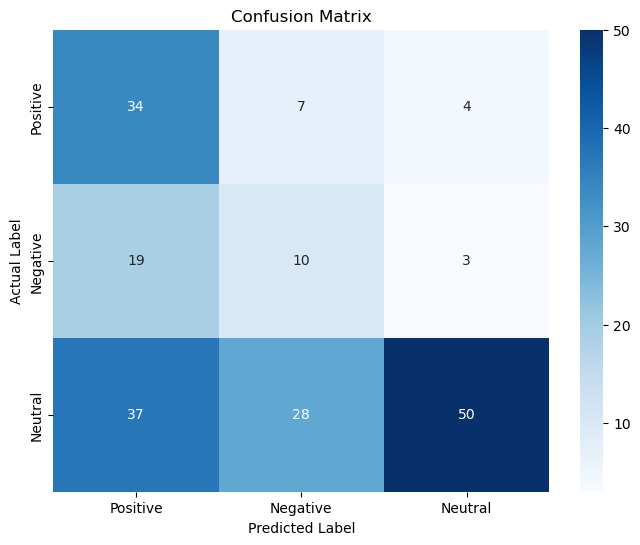

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_corr, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('plots/confusion_4_annotators/corr_lexicon_polarity.png', dpi=300, bbox_inches='tight')

plt.show()

# Manual lexicon sentiment accuracy

In [47]:
accuracy_score(sentiment_annotation_list,manual_lexicon_sent_score_list)

0.484375

In [48]:
print(classification_report(sentiment_annotation_list, manual_lexicon_sent_score_list))


              precision    recall  f1-score   support

           1       0.38      0.76      0.50        45
           2       0.22      0.31      0.26        32
           3       0.88      0.43      0.57       115

    accuracy                           0.48       192
   macro avg       0.49      0.50      0.44       192
weighted avg       0.65      0.48      0.50       192



In [49]:
cm_manual = confusion_matrix(sentiment_annotation_list, manual_lexicon_sent_score_list)


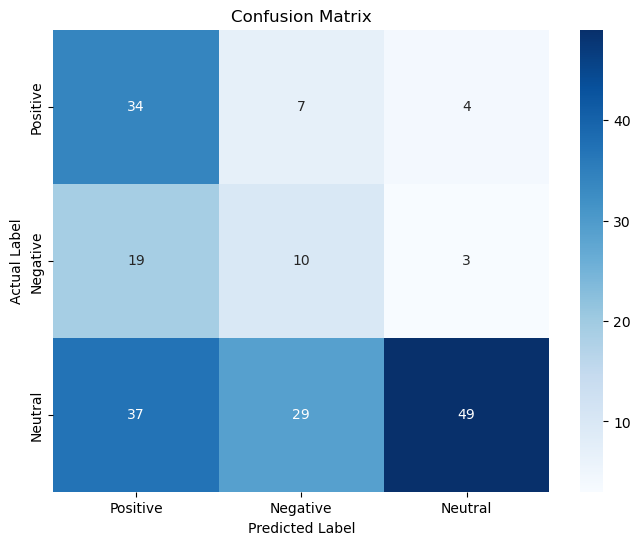

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_manual, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('plots/confusion_4_annotators/manual_lexicon_polarity.png', dpi=300, bbox_inches='tight')

plt.show()

## Computational lexicon sentiment accuracy

In [51]:
accuracy_score(sentiment_annotation_list,computational_lexicon_sent_score_list)

0.4479166666666667

In [52]:
print(classification_report(sentiment_annotation_list, computational_lexicon_sent_score_list))

              precision    recall  f1-score   support

           1       0.37      0.78      0.50        45
           2       0.20      0.31      0.25        32
           3       0.85      0.36      0.50       115

    accuracy                           0.45       192
   macro avg       0.48      0.48      0.42       192
weighted avg       0.63      0.45      0.46       192



In [53]:
cm_computational = confusion_matrix(sentiment_annotation_list, computational_lexicon_sent_score_list)


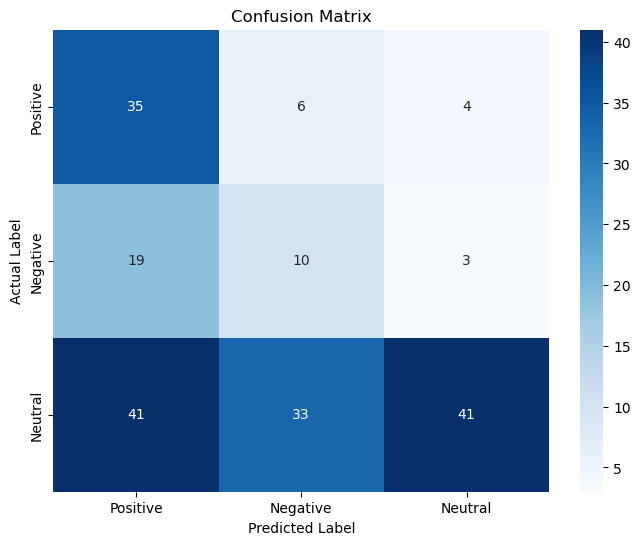

In [54]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_computational, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('plots/confusion_4_annotators/computational_lexicon_polarity.png', dpi=300, bbox_inches='tight')

plt.show()


In [99]:
gold_polarity.columns

Index(['question_code', 'sentence', 'annotation', 'nf_sentiment_pysentimiento',
       'nf_sentiment_lexicon_dispecs', 'nf_sentiment_lexicon_computational',
       'nf_sentiment_lexicon_corrected', 'manual_lexicon_sent_score',
       'comp_lexicon_sent_score', 'corr_lexicon_sent_score', 'sentiment_py',
       'sentiment_annotation_list', 'sentiment_py_list',
       'corr_lexicon_sent_score_list', 'manual_lexicon_sent_score_list',
       'computational_lexicon_sent_score_list'],
      dtype='object')

In [102]:
# Define the columns you want to drop (everything except what you want to keep)
columns_to_drop = ['nf_sentiment_pysentimiento', 'nf_sentiment_lexicon_dispecs', 
                   'nf_sentiment_lexicon_computational', 'nf_sentiment_lexicon_corrected',
                   'sentiment_annotation_list', 'sentiment_py_list', 
                   'corr_lexicon_sent_score_list', 'manual_lexicon_sent_score_list',
                   'computational_lexicon_sent_score_list']

# Drop the unwanted columns
df_filtered = gold_polarity.drop(columns=columns_to_drop)
df_filtered

,question_code,sentence,annotation,manual_lexicon_sent_score,comp_lexicon_sent_score,corr_lexicon_sent_score,sentiment_py
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",negative,POS,NEU,POS,NEG
1,G01Q02,"Continuamente la oygo decir à sus solas, y mas...",neutral,POS,POS,POS,NEU
2,G01Q03,Matò à un Joven por haver murmurado de la cond...,negative,NEU,NEU,NEU,NEG
3,G01Q04,"Pero no havia pisado sus umbrales, quando la D...",neutral,NEU,NEU,NEU,NEG
4,G01Q05,"Su tierno corazon, su espiritu admirable, su m...",positive,POS,POS,POS,POS
...,...,...,...,...,...,...,...
187,G00Q265,Nos quexamos continuamente de que nuestros dia...,negative,NEU,NEU,NEU,NEG
188,G00Q267,"Los dos sexôs, y todos los estados de la repúb...",negative,NEU,NEU,NEU,NEU
189,G00Q268,aplaude la buena educacion Francesa;,positive,POS,POS,POS,POS
190,G00Q269,"Si vmd. ama mas las alabanzas que el mérito, a...",neutral,POS,POS,POS,NEG


In [107]:
df_filtered = df_filtered.replace({'NEG': 'negative', 'POS': 'positive', 'NEU': 'neutral'})
df_filtered.to_csv('output/files/polarity_results.csv', encoding='utf-8', index=False)

# Emotion analysis evaluation

In [55]:
gold_emotions = pd.read_csv('input/gold_standard_corpus/4_annotators/gold_emotions.csv', delimiter=',', encoding='latin-1')
gold_emotions

,question_code,sentence,annotation
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",anger
1,G01Q07,"Mi muger aborrece hasta el nombre de Cortejo, ...",disgust
2,G01Q8,No es chanza: la mayor parte de los hombres no...,surprise
3,G01Q10,"La lectura à que yo intento conduciros, solo p...",trust
4,G01Q11,"Huid, Señora, de éstas, y preferid à su comuni...",fear
5,G01Q13,Convencerá tal vez nuestro espiritu; pero poco...,trust
6,G01Q60,"Una muger de esta cláse, es sucia en su casa, ...",disgust
7,G01Q62,Quanto mas lo miraba tanto mas me parecia habe...,surprise
8,G01Q64,Pero una vez que veo con tanto gusto de mi cor...,joy
9,G01Q65,¡O miserables traductores!,anger


In [56]:
gold_emotions['annotation'] = gold_emotions['annotation'].str.strip()


# Pysentimiento (emotion)

In [57]:

emotion_analyzer = create_analyzer(task="emotion", lang="es")

gold_emotions['emotion_pysentimiento'] = emotion_analyzer.predict(gold_emotions['sentence'])


Map:   0%|          | 0/52 [00:00<?, ? examples/s]

In [58]:
gold_emotions

,question_code,sentence,annotation,emotion_pysentimiento
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",anger,"AnalyzerOutput(output=sadness, probas={sadness..."
1,G01Q07,"Mi muger aborrece hasta el nombre de Cortejo, ...",disgust,"AnalyzerOutput(output=others, probas={others: ..."
2,G01Q8,No es chanza: la mayor parte de los hombres no...,surprise,"AnalyzerOutput(output=others, probas={others: ..."
3,G01Q10,"La lectura à que yo intento conduciros, solo p...",trust,"AnalyzerOutput(output=others, probas={others: ..."
4,G01Q11,"Huid, Señora, de éstas, y preferid à su comuni...",fear,"AnalyzerOutput(output=others, probas={others: ..."
5,G01Q13,Convencerá tal vez nuestro espiritu; pero poco...,trust,"AnalyzerOutput(output=others, probas={others: ..."
6,G01Q60,"Una muger de esta cláse, es sucia en su casa, ...",disgust,"AnalyzerOutput(output=others, probas={others: ..."
7,G01Q62,Quanto mas lo miraba tanto mas me parecia habe...,surprise,"AnalyzerOutput(output=sadness, probas={sadness..."
8,G01Q64,Pero una vez que veo con tanto gusto de mi cor...,joy,"AnalyzerOutput(output=joy, probas={joy: 0.989,..."
9,G01Q65,¡O miserables traductores!,anger,"AnalyzerOutput(output=anger, probas={anger: 0...."


In [63]:
# Emotion lexicon

new_dictionary_dir = "input/dictionaries/emotion/"

emotion_dict = {}
with open(new_dictionary_dir + "anger.txt", "r", encoding="utf-8") as em:
    emotion_dict["anger"] = em.read().splitlines()
with open(new_dictionary_dir + "disgust.txt", "r", encoding="utf-8") as em:
    emotion_dict["disgust"] = em.read().splitlines()
with open(new_dictionary_dir + "joy.txt", "r", encoding="utf-8") as em:
    emotion_dict["joy"] = em.read().splitlines()
with open(new_dictionary_dir + "fear.txt", "r", encoding="utf-8") as em:
    emotion_dict["fear"] = em.read().splitlines()
with open(new_dictionary_dir + "sadness.txt", "r", encoding="utf-8") as em:
    emotion_dict["sadness"] = em.read().splitlines()
with open(new_dictionary_dir +"surprise.txt", "r", encoding="utf-8") as em:
    emotion_dict["surprise"] = em.read().splitlines()
    

print("loaded {} anger words".format(len(emotion_dict["anger"])))
print("loaded {} disgust words".format(len(emotion_dict["disgust"])))
print("loaded {} joy words".format(len(emotion_dict["joy"])))
print("loaded {} fear words".format(len(emotion_dict["fear"])))
print("loaded {} sadness words".format(len(emotion_dict["sadness"])))
print("loaded {} surprise words".format(len(emotion_dict["surprise"])))

def one_emotion(text):
    tokens = nltk.word_tokenize(text)
    tokens = [t.lower() for t in tokens]
    num_anger = 0
    num_disgust = 0
    num_joy = 0
    num_fear = 0
    num_sadness = 0
    num_surprise = 0
    for anger in emotion_dict["anger"]:
        num_anger += tokens.count(anger.lower())
    for disgust in emotion_dict["disgust"]:
        num_disgust += tokens.count(disgust.lower())
    for joy in emotion_dict["joy"]:
        num_joy += tokens.count(joy.lower())
    for fear in emotion_dict["fear"]:
        num_fear += tokens.count(fear.lower())
    for sadness in emotion_dict["sadness"]:
        num_sadness += tokens.count(sadness.lower())
    for surprise in emotion_dict["surprise"]:
        num_surprise += tokens.count(surprise.lower())
    try:
        emotion_score = {'anger' : num_anger,'joy' : num_joy,'disgust' : num_disgust,'fear': num_fear, 'sadness': num_sadness, 'surprise':num_surprise}
        emotion = max(emotion_score, key=emotion_score.get)

    except:
        print("Something went wrong")
    if all(value == 0 for value in emotion_score.values()):
        return ("others")
    else:
        return emotion



loaded 382 anger words
loaded 209 disgust words
loaded 668 joy words
loaded 211 fear words
loaded 391 sadness words
loaded 175 surprise words


In [65]:
gold_emotions["dictionary_emotion"] = gold_emotions["sentence"].progress_apply(one_emotion)

  0%|          | 0/52 [00:00<?, ?it/s]

In [66]:
gold_emotions['emotion_pysentimiento'] = gold_emotions['emotion_pysentimiento'].astype('string')
gold_emotions['emotion_pysentimiento'] = gold_emotions['emotion_pysentimiento'].str.findall(r'\=([^,]+)\, probas')
gold_emotions['emotion_pysentimiento'] = gold_emotions['emotion_pysentimiento'].astype('string')
gold_emotions['emotion_pysentimiento'] = gold_emotions['emotion_pysentimiento'].str.replace('[', '')
gold_emotions['emotion_pysentimiento'] = gold_emotions['emotion_pysentimiento'].str.replace(']', '')
gold_emotions['emotion_pysentimiento'] = gold_emotions['emotion_pysentimiento'].str.replace("'", "")

C:\Users\krusic\AppData\Local\Temp\ipykernel_15440\3935701826.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gold_emotions['emotion_pysentimiento'] = gold_emotions['emotion_pysentimiento'].str.replace('[', '')
C:\Users\krusic\AppData\Local\Temp\ipykernel_15440\3935701826.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gold_emotions['emotion_pysentimiento'] = gold_emotions['emotion_pysentimiento'].str.replace(']', '')


In [69]:
gold_emotions

,question_code,sentence,annotation,emotion_pysentimiento,dictionary_emotion
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",anger,sadness,anger
1,G01Q07,"Mi muger aborrece hasta el nombre de Cortejo, ...",disgust,others,others
2,G01Q8,No es chanza: la mayor parte de los hombres no...,surprise,others,joy
3,G01Q10,"La lectura à que yo intento conduciros, solo p...",trust,others,joy
4,G01Q11,"Huid, Señora, de éstas, y preferid à su comuni...",fear,others,others
5,G01Q13,Convencerá tal vez nuestro espiritu; pero poco...,trust,others,joy
6,G01Q60,"Una muger de esta cláse, es sucia en su casa, ...",disgust,others,others
7,G01Q62,Quanto mas lo miraba tanto mas me parecia habe...,surprise,sadness,others
8,G01Q64,Pero una vez que veo con tanto gusto de mi cor...,joy,joy,joy
9,G01Q65,¡O miserables traductores!,anger,anger,others


In [68]:
gold_emotions = gold_emotions.replace('no emotion', 'no_emotion')


# Emotion dictionary

In [77]:
new_dictionary_dir = "input/dictionaries/emotion/"

emotion_dict = {}
with open(new_dictionary_dir + "anger.txt", "r", encoding="utf-8") as em:
    emotion_dict["anger"] = em.read().splitlines()
with open(new_dictionary_dir + "disgust.txt", "r", encoding="utf-8") as em:
    emotion_dict["disgust"] = em.read().splitlines()
with open(new_dictionary_dir + "joy.txt", "r", encoding="utf-8") as em:
    emotion_dict["joy"] = em.read().splitlines()
with open(new_dictionary_dir + "fear.txt", "r", encoding="utf-8") as em:
    emotion_dict["fear"] = em.read().splitlines()
with open(new_dictionary_dir + "sadness.txt", "r", encoding="utf-8") as em:
    emotion_dict["sadness"] = em.read().splitlines()
with open(new_dictionary_dir +"surprise.txt", "r", encoding="utf-8") as em:
    emotion_dict["surprise"] = em.read().splitlines()
    
print("loaded {} anger words".format(len(emotion_dict["anger"])))
print("loaded {} disgust words".format(len(emotion_dict["disgust"])))
print("loaded {} joy words".format(len(emotion_dict["joy"])))
print("loaded {} fear words".format(len(emotion_dict["fear"])))
print("loaded {} sadness words".format(len(emotion_dict["sadness"])))
print("loaded {} surprise words".format(len(emotion_dict["surprise"])))


loaded 382 anger words
loaded 209 disgust words
loaded 668 joy words
loaded 211 fear words
loaded 391 sadness words
loaded 175 surprise words


In [78]:
def one_emotion(text):
    tokens = nltk.word_tokenize(text)
    tokens = [t.lower() for t in tokens]
    num_anger = 0
    num_disgust = 0
    num_joy = 0
    num_fear = 0
    num_sadness = 0
    num_surprise = 0
    for anger in emotion_dict["anger"]:
        num_anger += tokens.count(anger.lower())
    for disgust in emotion_dict["disgust"]:
        num_disgust += tokens.count(disgust.lower())
    for joy in emotion_dict["joy"]:
        num_joy += tokens.count(joy.lower())
    for fear in emotion_dict["fear"]:
        num_fear += tokens.count(fear.lower())
    for sadness in emotion_dict["sadness"]:
        num_sadness += tokens.count(sadness.lower())
    for surprise in emotion_dict["surprise"]:
        num_surprise += tokens.count(surprise.lower())
    try:
        emotion_score = {'anger' : num_anger,'joy' : num_joy,'disgust' : num_disgust,'fear': num_fear, 'sadness': num_sadness, 'surprise':num_surprise}
        emotion = max(emotion_score, key=emotion_score.get)

    except:
        print("Something went wrong")
    if all(value == 0 for value in emotion_score.values()):
        return ("others")
    else:
        return emotion


In [80]:
gold_emotions["dictionary_emotion"] = gold_emotions["sentence"].progress_apply(one_emotion)


  0%|          | 0/22 [00:00<?, ?it/s]

# Calculating emotion accuracy

* joy - 1
* sadness - 2
* anger - 3
* disgust - 4
* surprise - 5
* fear - 6 
* no_emotion - 7
* others - 8

In [84]:
gold_emotions['emotion_annotation_list'] = gold_emotions['annotation'].replace(['joy','sadness','anger','disgust','surprise','fear','no_emotion', 'trust', 'anticipation'],['1','2','3','4','5','6','7', '8', '8'])


In [85]:
emotion_annotation_list = gold_emotions['emotion_annotation_list'].tolist()
print(emotion_annotation_list)

['3', '4', '5', '8', '6', '8', '4', '5', '1', '3', '8', '4', '1', '7', '8', '7', '1', '4', '3', '4', '3', '2', '4', '4', '2', '4', '2', '7', '2', '5', '2', '4', '4', '8', '2', '4', '2', '1', '3', '6', '7', '4', '3', '4', '1', '2', '7', '6', '3', '6', '5', '1']


In [86]:
gold_emotions['emotion_py_list'] = gold_emotions['emotion_pysentimiento'].replace(['joy','sadness','anger','disgust','surprise','fear','no_emotion', 'others'],['1','2','3','4','5','6','7', '8'])


In [87]:
emotion_py_list = gold_emotions['emotion_py_list'].tolist()
print(emotion_py_list)

['2', '8', '8', '8', '8', '8', '8', '2', '1', '3', '8', '8', '1', '8', '8', '8', '1', '8', '3', '3', '3', '2', '8', '2', '2', '3', '2', '1', '2', '8', '3', '3', '3', '8', '2', '8', '8', '1', '2', '2', '8', '3', '8', '3', '8', '2', '8', '2', '8', '6', '2', '1']


In [88]:
gold_emotions['emotion_lexicon_list'] = gold_emotions['emotion_pysentimiento'].replace(['joy','sadness','anger','disgust','surprise','fear','no_emotion', 'others'],['1','2','3','4','5','6','7','8'])

In [89]:
emotion_lexicon_list = gold_emotions['emotion_lexicon_list'].tolist()
print(emotion_lexicon_list)

['2', '8', '8', '8', '8', '8', '8', '2', '1', '3', '8', '8', '1', '8', '8', '8', '1', '8', '3', '3', '3', '2', '8', '2', '2', '3', '2', '1', '2', '8', '3', '3', '3', '8', '2', '8', '8', '1', '2', '2', '8', '3', '8', '3', '8', '2', '8', '2', '8', '6', '2', '1']


# Emotion Lexicon accuracy

In [90]:
accuracy_score(emotion_annotation_list,emotion_lexicon_list)

0.38461538461538464

In [91]:
print(classification_report(emotion_annotation_list,emotion_lexicon_list))

              precision    recall  f1-score   support

           1       0.83      0.83      0.83         6
           2       0.46      0.75      0.57         8
           3       0.30      0.43      0.35         7
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         4
           6       1.00      0.25      0.40         4
           7       0.00      0.00      0.00         5
           8       0.23      1.00      0.37         5

    accuracy                           0.38        52
   macro avg       0.35      0.41      0.32        52
weighted avg       0.31      0.38      0.30        52



C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
cm_lexicon_emotions = confusion_matrix(emotion_annotation_list, emotion_lexicon_list)


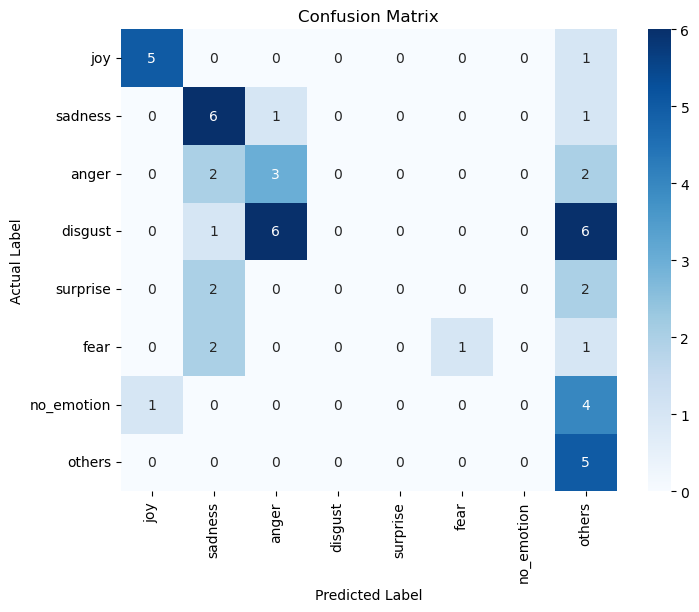

In [93]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_lexicon_emotions, annot=True, fmt='d', cmap='Blues', xticklabels= ['joy','sadness','anger','disgust','surprise','fear','no_emotion', 'others'], yticklabels=['joy','sadness','anger','disgust','surprise','fear','no_emotion', 'others'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('plots/confusion_4_annotators/sel_dictionary_emotion.png', dpi=300, bbox_inches='tight')

plt.show()


# Pysentimiento emotion accuracy

In [94]:
accuracy_score(emotion_annotation_list,emotion_py_list)

0.38461538461538464

In [95]:
print(classification_report(emotion_annotation_list,emotion_py_list))

              precision    recall  f1-score   support

           1       0.83      0.83      0.83         6
           2       0.46      0.75      0.57         8
           3       0.30      0.43      0.35         7
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         4
           6       1.00      0.25      0.40         4
           7       0.00      0.00      0.00         5
           8       0.23      1.00      0.37         5

    accuracy                           0.38        52
   macro avg       0.35      0.41      0.32        52
weighted avg       0.31      0.38      0.30        52



C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
cm_pysentimiento_emotion = confusion_matrix(emotion_annotation_list, emotion_py_list)


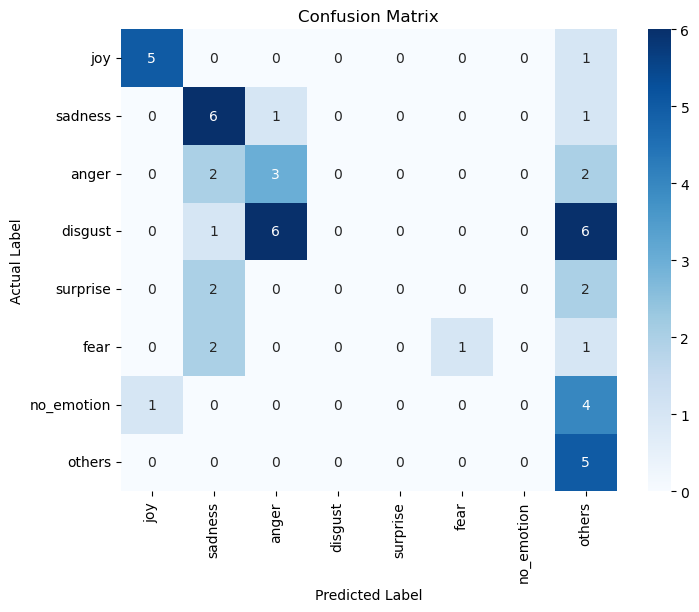

In [97]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_pysentimiento_emotion, annot=True, fmt='d', cmap='Blues', xticklabels= ['joy','sadness','anger','disgust','surprise','fear','no_emotion', 'others'], yticklabels=['joy','sadness','anger','disgust','surprise','fear','no_emotion', 'others'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('plots/confusion_4_annotators/pysentimiento_emotion.png', dpi=300, bbox_inches='tight')

plt.show()
